In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')

## Performing the EDA operations

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## checking for the dimensions of the data
print(f"The number of rows in the dataset are {df.shape[0]}.")
print(f"The number of columns in the dataset are {df.shape[1]}.")

The number of rows in the dataset are 303.
The number of columns in the dataset are 14.


In [5]:
## checking for the basic info about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## finding the numerical and categorical features
## here normal method won't work so will have to check the number of unique values in each column
for feature in df.columns:
    print(f"The number of unique values in the column {feature} are {df[feature].nunique()}")

The number of unique values in the column age are 41
The number of unique values in the column sex are 2
The number of unique values in the column cp are 4
The number of unique values in the column trestbps are 49
The number of unique values in the column chol are 152
The number of unique values in the column fbs are 2
The number of unique values in the column restecg are 3
The number of unique values in the column thalach are 91
The number of unique values in the column exang are 2
The number of unique values in the column oldpeak are 40
The number of unique values in the column slope are 3
The number of unique values in the column ca are 5
The number of unique values in the column thal are 4
The number of unique values in the column target are 2


In [8]:
## Now let's segregate the columns with less than 10 unique values as categorical and others as numerical
cat_feat = []

for feature in df.columns:
    if df[feature].nunique() < 10:
        cat_feat.append(feature)

In [9]:
cat_feat

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
## now numerical columns are the ones which are not in cat_feat
num_feat = [feature for feature in df.columns if feature not in cat_feat]

In [11]:
num_feat

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
## checking for the missing values in the dataset
for feature in df.columns:
    print(f"The percentage of missing values in the column '{feature}' are {(df[feature].isnull().sum()/df.shape[0])*100} %")

The percentage of missing values in the column 'age' are 0.0 %
The percentage of missing values in the column 'sex' are 0.0 %
The percentage of missing values in the column 'cp' are 0.0 %
The percentage of missing values in the column 'trestbps' are 0.0 %
The percentage of missing values in the column 'chol' are 0.0 %
The percentage of missing values in the column 'fbs' are 0.0 %
The percentage of missing values in the column 'restecg' are 0.0 %
The percentage of missing values in the column 'thalach' are 0.0 %
The percentage of missing values in the column 'exang' are 0.0 %
The percentage of missing values in the column 'oldpeak' are 0.0 %
The percentage of missing values in the column 'slope' are 0.0 %
The percentage of missing values in the column 'ca' are 0.0 %
The percentage of missing values in the column 'thal' are 0.0 %
The percentage of missing values in the column 'target' are 0.0 %


**Creating graphs:**
1. plotting numerical features VS target feature 
2. plotting the count of categories in the categorical feature
3. plotting distribution of numerical features
4. plotting numerical features with respect to each other
5. plotting correlation matrix between features

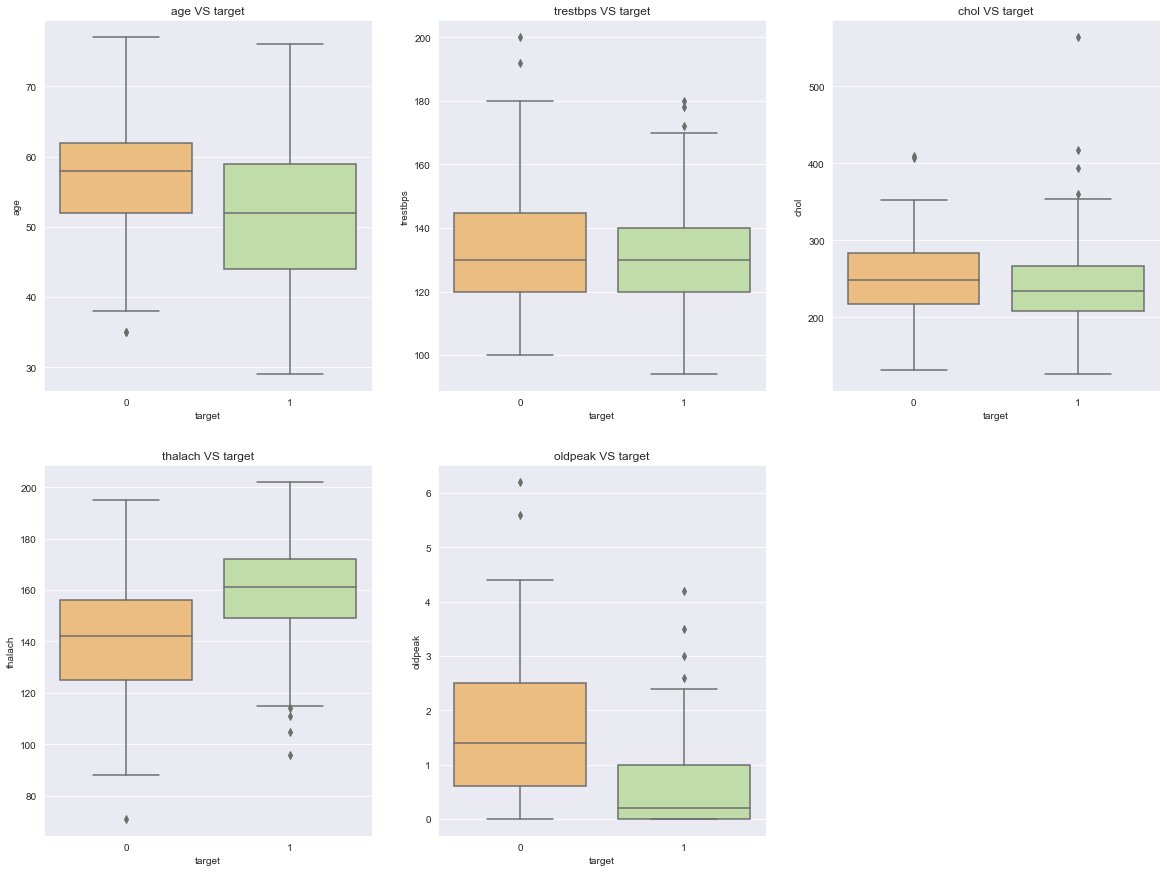

In [13]:
## checking for the outliers in the numerical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for index,feature in enumerate(num_feat):
    plt.subplot(2,3,index+1)
    sns.boxplot(x='target',y=feature,data=df,palette='Spectral')
    plt.xlabel('target')
    plt.ylabel(feature)
    plt.title(f"{feature} VS target")

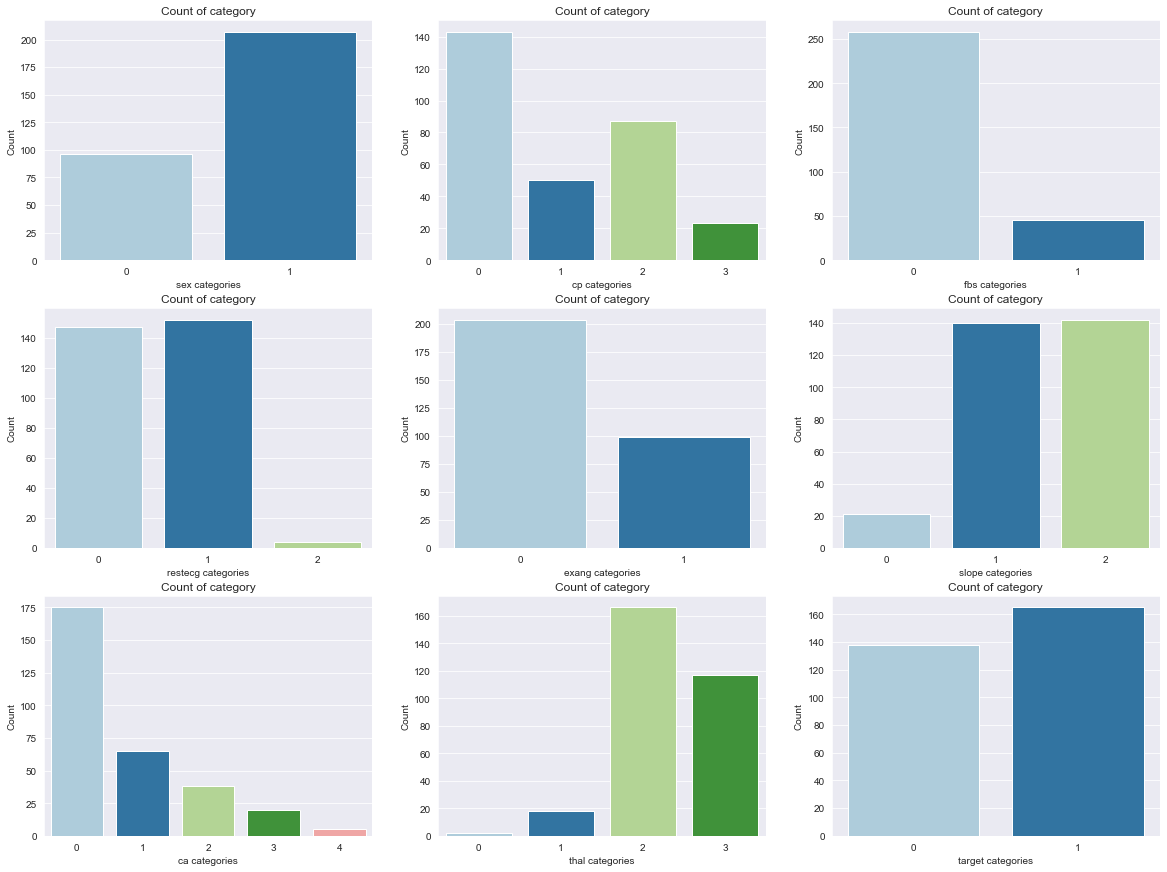

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for index,feature in enumerate(cat_feat):
    plt.subplot(3,3,index+1)
    sns.countplot(x=feature,data=df,palette='Paired')
    plt.xlabel(f"{feature} categories")
    plt.ylabel("Count")
    plt.title("Count of category")

dataset doesn't seem to be unbalanced

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

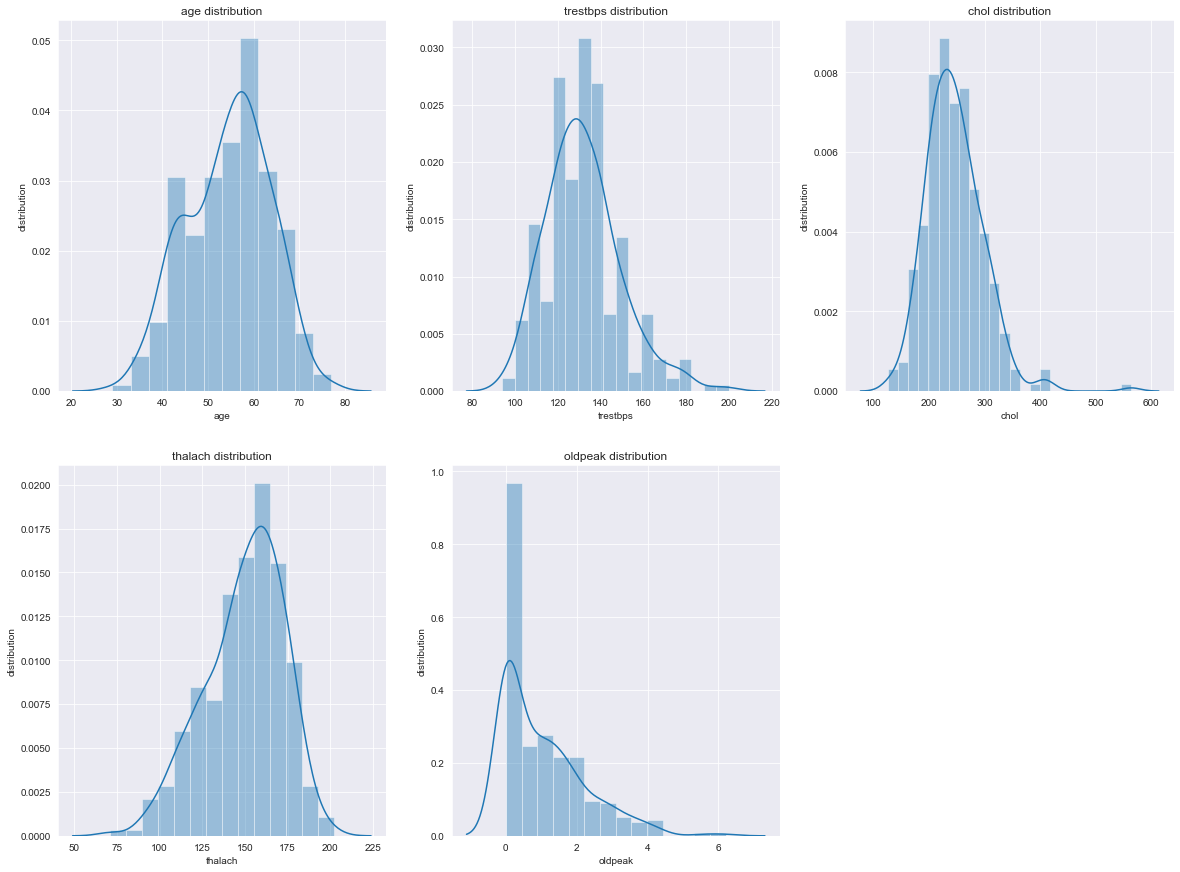

In [15]:
## checking the distribution of the numerical features
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
for index,feature in enumerate(num_feat):
    plt.subplot(2,3,index+1)
    sns.distplot(df[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("distribution")
    plt.title(f"{feature} distribution")

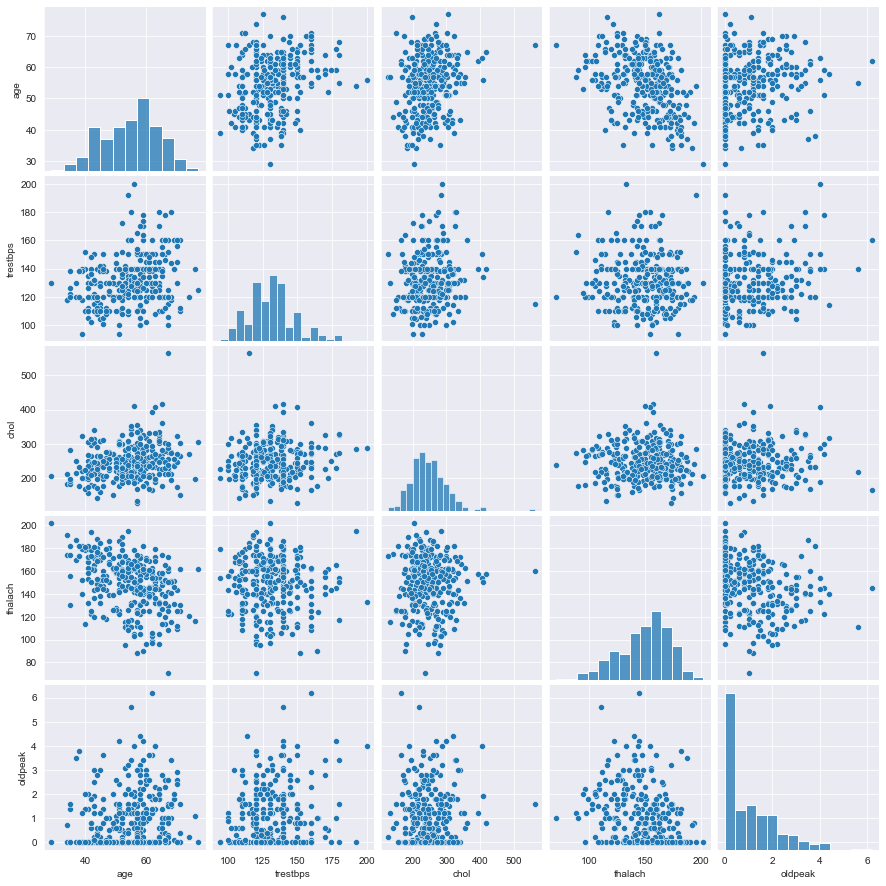

In [16]:
sns.pairplot(df[num_feat])

<AxesSubplot:>

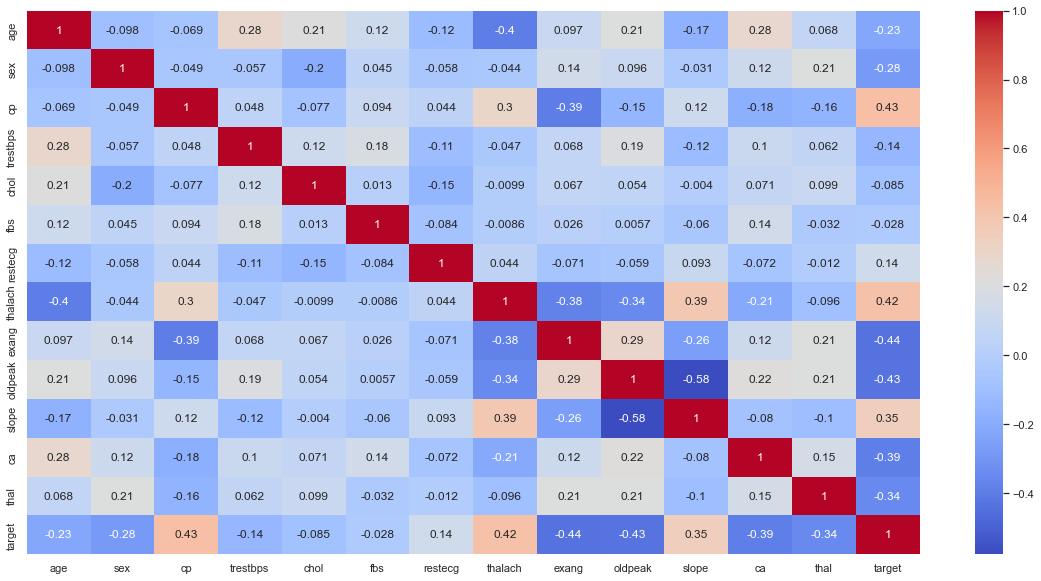

In [17]:
plt.figure(figsize = (20,10))
sns.set_theme()
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [18]:
## checking for multi-collinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF_Scores = pd.DataFrame()
VIF_Scores['Independent Columns'] = df.columns[:-1]
VIF_Scores['VIF Score'] = [variance_inflation_factor(df.iloc[:,:-1].values,i) for i in range(df.iloc[:,:-1].shape[1])]

VIF_Scores

,Independent Columns,VIF Score
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trestbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalach,42.742178
8,exang,2.022527
9,oldpeak,3.062890


In [19]:
## now finding the features with the VIF score greater than 5
VIF_Scores[VIF_Scores['VIF Score'] > 5]

,Independent Columns,VIF Score
0,age,38.998305
3,trestbps,58.557335
4,chol,26.267365
7,thalach,42.742178
10,slope,10.072734
12,thal,17.165303


since the features age, trestbps, chol and thalach are showing high values of VIF score, they should be dropped or combined with the other features. Here combining is not possible hence dropping is the only other option.

In [20]:
df.drop(columns=['age','trestbps','thalach','chol'])

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,1,3,1,0,0,2.3,0,0,1,1
1,1,2,0,1,0,3.5,0,0,2,1
2,0,1,0,0,0,1.4,2,0,2,1
3,1,1,0,1,0,0.8,2,0,2,1
4,0,0,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0
299,1,3,0,1,0,1.2,1,0,3,0
300,1,0,1,1,0,3.4,1,2,3,0
301,1,0,0,1,1,1.2,1,1,3,0


In [21]:
cat_feat = cat_feat[:-1]

## Splitting the dataset

In [22]:
## splitting the data into independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

## Analysing the model to find the range of precision and recall

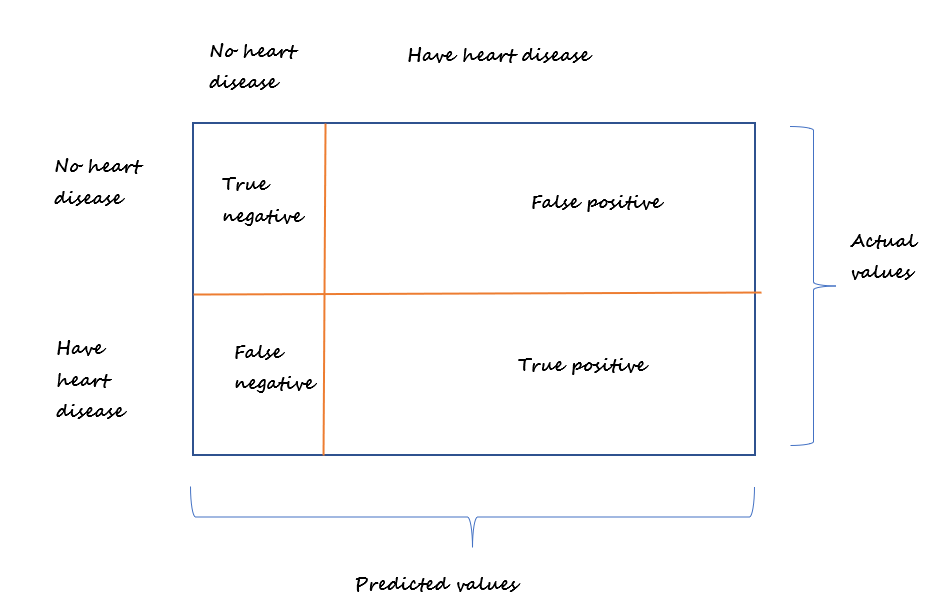

**For the prediction of the heart disease, following points should be taken into account:**
1. Number of people with heart disease and predicted as not having a heart disease should be minimum (low FN --> High recall)
2. Number of people without heart disease and predicted as having a heart disease can be large (high FP --> low precision)

## Creating the sklearn pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils import estimator_html_repr
from sklearn import set_config
set_config(display='diagram')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

In [30]:
## creating a pipeline for numerical features
num_pipeline = Pipeline([
    
    ('num_imputer',SimpleImputer(strategy="median")),
    ('std_scalar',StandardScaler())
    
])

In [31]:
## creating a pipeline for categorical feature
cat_pipeline = Pipeline([
    
    ('cat_imputer',SimpleImputer(strategy="most_frequent"))
])

In [32]:
## creating a combined pipeline for all the features

preprocessing_pipeline = ColumnTransformer([
    
    ('num_pipeline',num_pipeline,num_feat),
    ('cat_pipeline',cat_pipeline,cat_feat)
],remainder='passthrough')

In [33]:
## creating pipelines for different ML models

log_reg_pipe = Pipeline([
    ('logistic_regression_classifier',LogisticRegression(max_iter=2000))
])

knn_pipe = Pipeline([
    ('knn_classifier',KNeighborsClassifier(n_neighbors=3))
])

decision_tree_pipe = Pipeline([
    ('decision_tree_classifier',DecisionTreeClassifier(random_state=0))
])

random_forest_pipe = Pipeline([
    ('random_forest_classifier',RandomForestClassifier(n_estimators=11,random_state=543487))
])

In [34]:
## creating many full pipelines

full_pipeline1 = Pipeline([
    ('preprocessing1',preprocessing_pipeline),
    ('model_training1',log_reg_pipe)
])

full_pipeline2 = Pipeline([
    ('preprocessing2',preprocessing_pipeline),
    ('model_training2',knn_pipe)
])


full_pipeline3 = Pipeline([
    ('preprocessing3',preprocessing_pipeline),
    ('model_training3',decision_tree_pipe)
])

full_pipeline4 = Pipeline([
    ('preprocessing4',preprocessing_pipeline),
    ('model_training4',random_forest_pipe)
])

## visualizing the full pipelines

In [35]:
full_pipeline1

Pipeline(steps=[('preprocessing1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model_training1',
                 Pipeline(steps=[('logistic_regression_classifier',
                                  LogisticRegression(max_iter=2000))]))])

In [36]:
full_pipeline2

Pipeline(steps=[('preprocessing2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model_training2',
                 Pipeline(steps=[('knn_classifier',
                                  KNeighborsClassifier(n_neighbors=3))]))])

In [37]:
full_pipeline3

Pipeline(steps=[('preprocessing3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model_training3',
                 Pipeline(steps=[('decision_tree_classifier',
                                  DecisionTreeClassifier(random_state=0))]))])

In [38]:
full_pipeline4

Pipeline(steps=[('preprocessing4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model_training4',
                 Pipeline(steps=[('random_forest_classifier',
                                  RandomForestClassifier(n_estimators=11,
                                                         random_state=543487))]))])

## saving the pipelines as a html file

In [39]:
pipelines = [full_pipeline1,full_pipeline2,full_pipeline3,full_pipeline4]
classification_algo = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']

In [40]:
with open('full_pipeline1.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline1))

In [41]:
with open('full_pipeline2.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline2))

In [42]:
with open('full_pipeline3.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline3))

In [43]:
with open('full_pipeline4.html', 'w',encoding="utf-8") as f:  
    f.write(estimator_html_repr(full_pipeline4))

## Checking the cross validation score for each algorithm

In [44]:
stf = StratifiedKFold(n_splits=5, random_state=12334, shuffle=True)

In [45]:
for i in range(len(pipelines)):
    print(f"The cross validation score for {classification_algo[i]} algorithm is {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=stf,scoring='f1').mean(),3)} +/- {np.round(cross_val_score(pipelines[i],X_train,y_train,cv=stf,scoring='f1').std(),3)} (scoring technique: f1 score)")

The cross validation score for LogisticRegression algorithm is 0.878 +/- 0.034 (scoring technique: f1 score)
The cross validation score for KNeighborsClassifier algorithm is 0.825 +/- 0.045 (scoring technique: f1 score)
The cross validation score for DecisionTreeClassifier algorithm is 0.759 +/- 0.015 (scoring technique: f1 score)
The cross validation score for RandomForestClassifier algorithm is 0.856 +/- 0.023 (scoring technique: f1 score)


**It seems that the logistic regression algorithm, RandomForestClassifier and KNeighborsClassifier algorithm are giving the highest f1 score values. So, we will use those algorithms in VotingClassifier ensemble method**

**But first we will perform hyperparameter tuning for these algorithms**

### hyperparameter tuning logistic regression

In [144]:
full_pipeline1.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing1', 'model_training1', 'preprocessing1__n_jobs', 'preprocessing1__remainder', 'preprocessing1__sparse_threshold', 'preprocessing1__transformer_weights', 'preprocessing1__transformers', 'preprocessing1__verbose', 'preprocessing1__verbose_feature_names_out', 'preprocessing1__num_pipeline', 'preprocessing1__cat_pipeline', 'preprocessing1__num_pipeline__memory', 'preprocessing1__num_pipeline__steps', 'preprocessing1__num_pipeline__verbose', 'preprocessing1__num_pipeline__num_imputer', 'preprocessing1__num_pipeline__std_scalar', 'preprocessing1__num_pipeline__num_imputer__add_indicator', 'preprocessing1__num_pipeline__num_imputer__copy', 'preprocessing1__num_pipeline__num_imputer__fill_value', 'preprocessing1__num_pipeline__num_imputer__missing_values', 'preprocessing1__num_pipeline__num_imputer__strategy', 'preprocessing1__num_pipeline__num_imputer__verbose', 'preprocessing1__num_pipeline__std_scalar__copy', 'preprocessing1__num_pipeli

In [47]:
param1 = {}
param1['model_training1__logistic_regression_classifier__C'] = np.arange(1,11,0.5)
param1['model_training1__logistic_regression_classifier__class_weight'] = ['dict','balanced']
param1['model_training1__logistic_regression_classifier__solver'] = ['newton-cg','lbfgs','sag','saga']

In [48]:
param1

{'model_training1__logistic_regression_classifier__C': array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5]),
 'model_training1__logistic_regression_classifier__class_weight': ['dict',
  'balanced'],
 'model_training1__logistic_regression_classifier__solver': ['newton-cg',
  'lbfgs',
  'sag',
  'saga']}

In [49]:
rscv_model1 = GridSearchCV(full_pipeline1,param1,scoring='f1')
rscv_model1_results = rscv_model1.fit(X_train,y_train)

In [50]:
rscv_model1_results.best_params_

{'model_training1__logistic_regression_classifier__C': 1.0,
 'model_training1__logistic_regression_classifier__class_weight': 'dict',
 'model_training1__logistic_regression_classifier__solver': 'newton-cg'}

In [51]:
full_pipeline1.named_steps['model_training1'].named_steps['logistic_regression_classifier'].set_params(solver='newton-cg',class_weight='dict',C=1)

LogisticRegression(C=1, class_weight='dict', max_iter=2000, solver='newton-cg')

In [52]:
full_pipeline1

Pipeline(steps=[('preprocessing1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('model_training1',
                 Pipeline(steps=[('logistic_regression_classifier',
                                  LogisticRegression(C=1, class_weight='dict',
                                                     max_iter=2000,
                                                     solver='newton-cg'))]))])

### hyperparameter tuning of KNN classifier

In [145]:
full_pipeline2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing2', 'model_training2', 'preprocessing2__n_jobs', 'preprocessing2__remainder', 'preprocessing2__sparse_threshold', 'preprocessing2__transformer_weights', 'preprocessing2__transformers', 'preprocessing2__verbose', 'preprocessing2__verbose_feature_names_out', 'preprocessing2__num_pipeline', 'preprocessing2__cat_pipeline', 'preprocessing2__num_pipeline__memory', 'preprocessing2__num_pipeline__steps', 'preprocessing2__num_pipeline__verbose', 'preprocessing2__num_pipeline__num_imputer', 'preprocessing2__num_pipeline__std_scalar', 'preprocessing2__num_pipeline__num_imputer__add_indicator', 'preprocessing2__num_pipeline__num_imputer__copy', 'preprocessing2__num_pipeline__num_imputer__fill_value', 'preprocessing2__num_pipeline__num_imputer__missing_values', 'preprocessing2__num_pipeline__num_imputer__strategy', 'preprocessing2__num_pipeline__num_imputer__verbose', 'preprocessing2__num_pipeline__std_scalar__copy', 'preprocessing2__num_pipeli

In [54]:
param2 = {}
param2['model_training2__knn_classifier__n_neighbors'] = np.arange(2,11,1)
param2['model_training2__knn_classifier__weights'] = ['uniform','distance']

In [55]:
rscv_model2 = GridSearchCV(full_pipeline2,param2,scoring='f1')
rscv_model2_results = rscv_model2.fit(X_train,y_train)

In [56]:
rscv_model2_results.best_params_

{'model_training2__knn_classifier__n_neighbors': 5,
 'model_training2__knn_classifier__weights': 'uniform'}

In [57]:
full_pipeline2.named_steps['model_training2'].named_steps['knn_classifier'].set_params(n_neighbors=5,weights='uniform')

KNeighborsClassifier()

## hyperparameter tuning for random forest classifier

In [146]:
full_pipeline4.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing4', 'model_training4', 'preprocessing4__n_jobs', 'preprocessing4__remainder', 'preprocessing4__sparse_threshold', 'preprocessing4__transformer_weights', 'preprocessing4__transformers', 'preprocessing4__verbose', 'preprocessing4__verbose_feature_names_out', 'preprocessing4__num_pipeline', 'preprocessing4__cat_pipeline', 'preprocessing4__num_pipeline__memory', 'preprocessing4__num_pipeline__steps', 'preprocessing4__num_pipeline__verbose', 'preprocessing4__num_pipeline__num_imputer', 'preprocessing4__num_pipeline__std_scalar', 'preprocessing4__num_pipeline__num_imputer__add_indicator', 'preprocessing4__num_pipeline__num_imputer__copy', 'preprocessing4__num_pipeline__num_imputer__fill_value', 'preprocessing4__num_pipeline__num_imputer__missing_values', 'preprocessing4__num_pipeline__num_imputer__strategy', 'preprocessing4__num_pipeline__num_imputer__verbose', 'preprocessing4__num_pipeline__std_scalar__copy', 'preprocessing4__num_pipeli

In [59]:
param4 = {}
param4['model_training4__random_forest_classifier__n_estimators'] = np.arange(100,1500,100)
param4['model_training4__random_forest_classifier__criterion'] = ['gini','entropy']
param4['model_training4__random_forest_classifier__max_features'] = ['auto','sqrt','log2']

In [60]:
param4

{'model_training4__random_forest_classifier__n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400]),
 'model_training4__random_forest_classifier__criterion': ['gini', 'entropy'],
 'model_training4__random_forest_classifier__max_features': ['auto',
  'sqrt',
  'log2']}

In [61]:
rscv_model4 = GridSearchCV(full_pipeline4,param4,scoring='f1')
rscv_model4_results = rscv_model4.fit(X_train,y_train)

In [62]:
rscv_model4_results.best_params_

{'model_training4__random_forest_classifier__criterion': 'gini',
 'model_training4__random_forest_classifier__max_features': 'auto',
 'model_training4__random_forest_classifier__n_estimators': 1100}

In [63]:
full_pipeline4.named_steps['model_training4'].named_steps['random_forest_classifier'].set_params(criterion='gini',max_features='auto',n_estimators=1100)

RandomForestClassifier(n_estimators=1100, random_state=543487)

## combining logistic regression and the knn classifier using VotingClassifier

In [70]:
vc = VotingClassifier([
    
    ('lr',full_pipeline1),
    ('knn',full_pipeline2),
    ('rf',full_pipeline4)
],voting='soft')

In [71]:
model = vc.fit(X_train,y_train)

In [72]:
decision_score = model.predict_proba(X_test)

In [75]:
## decision score for the category "having the heart disease"
positive_decision_score = decision_score[:,1]

In [76]:
positive_decision_score

array([0.25502857, 0.1253798 , 0.92721652, 0.98001944, 0.23890416,
       0.81495581, 0.99365196, 0.91096552, 0.86182757, 0.41504077,
       0.02690695, 0.76233705, 0.98321726, 0.9786624 , 0.9462744 ,
       0.16310009, 0.5763485 , 0.99143687, 0.97967858, 0.20785345,
       0.38989489, 0.73651008, 0.35918368, 0.82077846, 0.00935334,
       0.95769801, 0.81541981, 0.94538785, 0.92041021, 0.56729589,
       0.07664695, 0.79427658, 0.79167184, 0.19888122, 0.04631019,
       0.14161064, 0.7277602 , 0.57426538, 0.88064761, 0.96243766,
       0.12740988, 0.69485091, 0.38666856, 0.59356416, 0.20798307,
       0.8175968 , 0.01256979, 0.99159138, 0.7675646 , 0.20004888,
       0.44378249, 0.81386101, 0.0389928 , 0.60233669, 0.61149514,
       0.15014017, 0.63792086, 0.90306104, 0.99660237, 0.45066404,
       0.96268312, 0.09481585, 0.09405869, 0.75046963, 0.68546932,
       0.80556383, 0.81209488, 0.63425848, 0.41240408, 0.00734859,
       0.00374962, 0.9621887 , 0.11877112, 0.61942919, 0.85934

In [130]:
precisions, recalls, thresholds = precision_recall_curve(y_test,positive_decision_score)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(12,8))
    plt.plot(thresholds,precisions[:-1], 'b',label="Precision")
    plt.plot(thresholds,recalls[:-1], 'g',label="Recall")
    plt.axhline(y=0.95,label="high recall: 0.95",color='r',linestyle="--")
    plt.legend(loc='best')
    plt.xlabel('Threshold')

def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(12,8))
    plt.plot(recalls,precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")

In [131]:
precisions

array([0.65853659, 0.65432099, 0.6625    , 0.67088608, 0.67948718,
       0.68831169, 0.69736842, 0.70666667, 0.71621622, 0.7260274 ,
       0.73611111, 0.73239437, 0.74285714, 0.75362319, 0.76470588,
       0.76119403, 0.75757576, 0.76923077, 0.765625  , 0.76190476,
       0.75806452, 0.75409836, 0.76666667, 0.77966102, 0.77586207,
       0.77192982, 0.76785714, 0.78181818, 0.77777778, 0.79245283,
       0.78846154, 0.78431373, 0.8       , 0.79591837, 0.8125    ,
       0.80851064, 0.80434783, 0.82222222, 0.81818182, 0.8372093 ,
       0.83333333, 0.85365854, 0.85      , 0.87179487, 0.86842105,
       0.89189189, 0.88888889, 0.88571429, 0.88235294, 0.90909091,
       0.90625   , 0.90322581, 0.9       , 0.89655172, 0.89285714,
       0.88888889, 0.92307692, 0.92      , 0.95833333, 0.95652174,
       0.95454545, 0.95238095, 0.95      , 0.94736842, 0.94444444,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [132]:
recalls

array([1.        , 0.98148148, 0.98148148, 0.98148148, 0.98148148,
       0.98148148, 0.98148148, 0.98148148, 0.98148148, 0.98148148,
       0.98148148, 0.96296296, 0.96296296, 0.96296296, 0.96296296,
       0.94444444, 0.92592593, 0.92592593, 0.90740741, 0.88888889,
       0.87037037, 0.85185185, 0.85185185, 0.85185185, 0.83333333,
       0.81481481, 0.7962963 , 0.7962963 , 0.77777778, 0.77777778,
       0.75925926, 0.74074074, 0.74074074, 0.72222222, 0.72222222,
       0.7037037 , 0.68518519, 0.68518519, 0.66666667, 0.66666667,
       0.64814815, 0.64814815, 0.62962963, 0.62962963, 0.61111111,
       0.61111111, 0.59259259, 0.57407407, 0.55555556, 0.55555556,
       0.53703704, 0.51851852, 0.5       , 0.48148148, 0.46296296,
       0.44444444, 0.44444444, 0.42592593, 0.42592593, 0.40740741,
       0.38888889, 0.37037037, 0.35185185, 0.33333333, 0.31481481,
       0.31481481, 0.2962963 , 0.27777778, 0.25925926, 0.24074074,
       0.22222222, 0.2037037 , 0.18518519, 0.16666667, 0.14814

In [133]:
thresholds

array([0.11502427, 0.11877112, 0.1253798 , 0.12740988, 0.14161064,
       0.15014017, 0.16310009, 0.19888122, 0.19910119, 0.20004888,
       0.20785345, 0.20798307, 0.23890416, 0.25502857, 0.35918368,
       0.38666856, 0.38989489, 0.41240408, 0.41504077, 0.44378249,
       0.45066404, 0.5118523 , 0.56729589, 0.57426538, 0.5763485 ,
       0.59356416, 0.60233669, 0.61149514, 0.61942919, 0.63425848,
       0.63792086, 0.64534813, 0.68198902, 0.68546932, 0.69053193,
       0.69485091, 0.69983066, 0.7064105 , 0.7277602 , 0.73651008,
       0.74716998, 0.75046963, 0.76233705, 0.7675646 , 0.79167184,
       0.79427658, 0.80556383, 0.81209488, 0.81386101, 0.81495581,
       0.81522636, 0.81541981, 0.8175968 , 0.82077846, 0.85934678,
       0.86182757, 0.86894913, 0.88064761, 0.88956433, 0.89265853,
       0.90306104, 0.91096552, 0.92041021, 0.92721652, 0.9281909 ,
       0.94538785, 0.9462744 , 0.95769801, 0.95846197, 0.9621887 ,
       0.96243766, 0.96268312, 0.96662739, 0.97111885, 0.97866

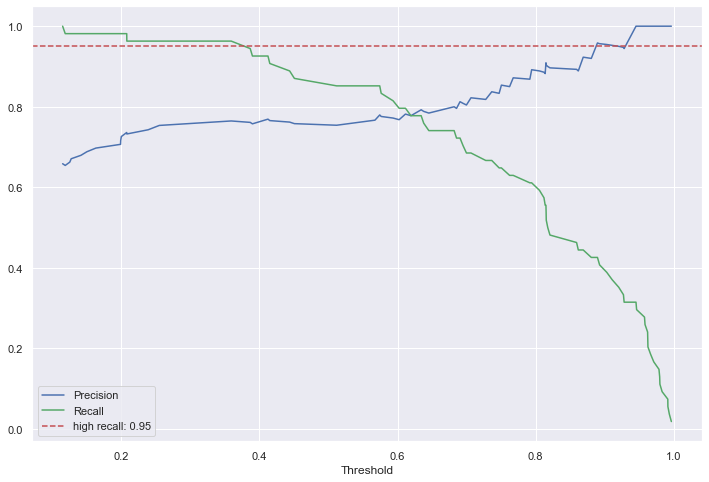

In [134]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

**Here the 0.95 recall line intersects with recall line at around the threshold of 0.38**

### Let's classify the target values based on this threshold

In [139]:
y_pred_new = np.where(positive_decision_score > 0.38, 1, 0)

In [140]:
y_pred_new

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

**Checking the precision, recall and the f1 score of the model and validating whether it is giving high recall or not**

In [141]:
## finding the precision and recall score
print(f"The precison score of the final model is {np.round(precision_score(y_test,y_pred_new),3)}")
print(f"The recall score of the final model is {np.round(recall_score(y_test,y_pred_new),3)}")
print(f"The f1 score of the final model is {np.round(f1_score(y_test,y_pred_new),3)}")

The precison score of the final model is 0.761
The recall score of the final model is 0.944
The f1 score of the final model is 0.843


In [142]:
## creating the confusion matrix
confusion_matrix(y_test, y_pred_new)

array([[30, 16],
       [ 3, 51]], dtype=int64)

**Saving the model as a pickle file**

In [143]:
import joblib
joblib.dump(model,'final_model.pkl')

['final_model.pkl']